In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from transformers import BertTokenizer, TFBertModel
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
########### c'est cette version qu'il faut installer car toute les version que j'installe ici ne marche pas j;ai pris celle qui marche sur mon pc
########## Ne pas executer deux fois #############

!pip install --upgrade tensorflow==2.12.0
!pip install transformers==4.37.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 84.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 83.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 107.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 51.0 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.4
    Unins

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 71.8 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.38.2
    Uninstalling transformers-4.38.2:
      Successfully uninstalled transformers-4.38.2


In [2]:
########### c'est cette version qu'il faut installer car toute les version que j'installe ici ne marche pas j;ai pris celle qui marche sur mon pc


import tensorflow as tf
import transformers

print("Version de TensorFlow :", tf.__version__)
print("Version de Transformers :", transformers.__version__)

Version de TensorFlow : 2.12.0
Version de Transformers : 4.37.1


In [4]:
################ Bon Code ###############
#### charger et lire un dataset [.zip] sur coolab ####

import zipfile
import os
import pandas as pd

import shutil


chemin_zip_heavy_attacks = "AttacksHeavy.zip"
chemin_zip_heavy_benign = "BenignHeavy.zip"


chemin_zip_light_attacks = "AttacksLight.zip"
chemin_zip_light_benign = "BenignLight.zip"


# Fonction pour extraire les fichiers zip
def extraire_zip(chemin_zip):
    with zipfile.ZipFile(chemin_zip, 'r') as zip_ref:
        zip_ref.extractall("extraction_temp")  # Extraire les fichiers zip dans un répertoire temporaire

# Fonction pour charger les fichiers CSV d'un type spécifique (stateful ou stateless)
def charger_concatener_donnees(sous_dossier, prefixe):
    # Lister tous les fichiers CSV dans le sous-dossier
    fichiers_csv = [f for f in os.listdir(f"extraction_temp/{sous_dossier}") if f.startswith(prefixe) and f.endswith('.csv')]
    # Lire chaque fichier CSV et le stocker dans une liste de DataFrames
    dataframes = [pd.read_csv(f"extraction_temp/{sous_dossier}/{f}") for f in fichiers_csv]
    # Concaténer les DataFrames en un seul
    return pd.concat(dataframes, ignore_index=True)

# Extraire les fichiers zip
extraire_zip(chemin_zip_heavy_attacks)
extraire_zip(chemin_zip_heavy_benign)

extraire_zip(chemin_zip_light_attacks)
extraire_zip(chemin_zip_light_benign)

########## Heavy ############

# Charger et concaténer les données stateful
stateful_heavy_attack_data = charger_concatener_donnees("AttacksHeavy", "stateful")
stateful_heavy_benign_data = charger_concatener_donnees("BenignHeavy", "stateful")

# Charger et concaténer les données stateless
stateless_heavy_attack_data = charger_concatener_donnees("AttacksHeavy", "stateless")
stateless_heavy_benign_data = charger_concatener_donnees("BenignHeavy", "stateless")


#### Light ###############

# Charger et concaténer les données stateful
stateful_light_attack_data = charger_concatener_donnees("AttacksLight", "stateful")
stateful_light_benign_data = charger_concatener_donnees("BenignLight", "stateful")

# Charger et concaténer les données stateless
stateless_light_attack_data = charger_concatener_donnees("AttacksLight", "stateless")
stateless_light_benign_data = charger_concatener_donnees("BenignLight", "stateless")



# Supprimer le répertoire temporaire après avoir terminé

# Vérifier si le répertoire temporaire existe
if os.path.exists("extraction_temp"):
    # Supprimer le répertoire temporaire et son contenu
    shutil.rmtree("extraction_temp")


# Maintenant, vous avez vos données prêtes à être utilisées


In [5]:

#### Sur-Echantillonage dataset  ####

##  Heavy Attack   72,028(stateful)      251,670 (stateless)

##  Heavy-Benign      156,014                  402,767

### Light Attack      11,295                   42,683

### Light-Benign      109,766                  281,164


#### Heavy ATTACK #########
stateful_heavy_attack_data = stateful_heavy_attack_data.sample(72028, random_state=42)
stateful_heavy_benign_data = stateful_heavy_benign_data.sample(156014, random_state=42,replace=True)

stateless_heavy_attack_data = stateless_heavy_attack_data.sample(251670, random_state=42)
stateless_heavy_benign_data = stateless_heavy_benign_data.sample(402767, random_state=42,replace=True)

#### Light ATTACK #########

# Charger les données stateful
stateful_light_attack_data = stateful_light_attack_data.sample(11295, random_state=42)
stateful_light_benign_data = stateful_light_benign_data.sample(109766, random_state=42,replace=True)
# Charger les données stateless
stateless_light_attack_data = stateless_light_attack_data.sample(42683, random_state=42)
stateless_light_benign_data = stateless_light_benign_data.sample(281164, random_state=42,replace=True)

############## taille apres re-echantillonage #############
print("Taille Stateful Heavy attack puis Stateless Heavy attack")
print(stateful_heavy_attack_data.shape)
print(stateless_heavy_attack_data.shape)

print("  \n")

print("Taille Stateful Bengin attack puis Stateless Begnin attack ")
print(stateful_heavy_benign_data.shape)
print(stateless_heavy_benign_data.shape)

print("  \n")


############## taille apres re-echantillonage #############
print("Taille Stateful Heavy Light puis Stateless Light")
print(stateful_light_attack_data.shape)
print(stateless_light_attack_data.shape)

print("  \n")

print("Taille Stateful Bengin Light puis Stateless Begnin Light")
print(stateful_light_benign_data.shape)
print(stateless_light_benign_data.shape)


#### concatenation  sur axis = 1 ########

print(" cocncatenantion sur axis = 0 sur les y \n")
print(" Heavy attack")

heavy_attack = pd.concat([stateful_heavy_attack_data, stateless_heavy_attack_data], axis=0)
print(heavy_attack.shape)

#### j'ajoute la classe / label ######

heavy_attack['class'] = 'heavy_attacks'
print(heavy_attack.shape)

print(" \n")
print(" Heavy Bengnin")

heavy_bengin = pd.concat([stateful_heavy_benign_data, stateless_heavy_benign_data], axis=0)
print(heavy_bengin.shape)

#### j'ajoute la classe / label ######

heavy_bengin['class'] = 'heavy_bengnin'
print(heavy_bengin.shape)

print(" \n")
print(" Light attack")

light_attack = pd.concat([stateful_light_attack_data, stateless_light_attack_data], axis=0)
print(light_attack.shape)


#### j'ajoute la classe / label ######
light_attack['class'] = 'light_attacks'
print(light_attack.shape)


print(" \n")
print(" Light Bengnin")

light_bengin = pd.concat([stateful_light_benign_data, stateless_light_benign_data], axis=0)
print(light_bengin.shape)

#### j'ajoute la classe / label ######
light_bengin['class'] = 'light_bengnin'
print(light_bengin.shape)



Taille Stateful Heavy attack puis Stateless Heavy attack
(72028, 27)
(251670, 15)
  

Taille Stateful Bengin attack puis Stateless Begnin attack 
(156014, 27)
(402767, 15)
  

Taille Stateful Heavy Light puis Stateless Light
(11295, 27)
(42683, 15)
  

Taille Stateful Bengin Light puis Stateless Begnin Light
(109766, 27)
(281164, 15)
 cocncatenantion sur axis = 0 sur les y 

 Heavy attack
(323698, 42)
(323698, 43)
 

 Heavy Bengnin
(558781, 42)
(558781, 43)
 

 Light attack
(53978, 42)
(53978, 43)
 

 Light Bengnin
(390930, 42)
(390930, 43)


In [6]:
################################### CONCATENATION Final des donnee sur axis = 0 ########
########################################################################################
########################################################################################


# 2. Concaténer les données

final_data = pd.concat([heavy_attack, heavy_bengin,light_attack,light_bengin], axis=0, ignore_index=True)

# 3. Supprimer les colonnes redondantes dans les données catégorielles
final_data = final_data.loc[:, ~final_data.columns.duplicated()]

# X_numerical = final_data.select_dtypes(include=['int64', 'float64'])

# X_categorical = final_data.select_dtypes(exclude='number').drop('class', axis=1)

X_numerical = final_data[['rr','A_frequency','FQDN_count','upper','lower','numeric','entropy','special', 'labels', 'labels_max','labels_average','len']]

X_categorical = final_data[['rr_type','unique_ttl','timestamp', 'longest_word', 'sld']]

y = final_data['class']

print(X_numerical.shape)
print(X_categorical.shape)

print(y.shape)
print(final_data.shape)



(1327387, 12)
(1327387, 5)
(1327387,)
(1327387, 43)


In [ ]:
################# EDA ########################

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 1. Résumé des données : Calcul des statistiques descriptives
summary_statistics = final_data.describe()
print(summary_statistics)

# 2. Visualisation des données
# Histogrammes pour les variables numériques
for column in final_data.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(final_data[column], bins=30, kde=True)
    plt.title(f'Histogramme de {column}')
    plt.xlabel(column)
    plt.ylabel('Fréquence')
    plt.show()

# Boîtes à moustaches pour les variables numériques
for column in final_data.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=final_data[column])
    plt.title(f'Boîte à moustaches de {column}')
    plt.ylabel(column)
    plt.show()

# Diagrammes en barres pour les variables catégorielles
for column in final_data.select_dtypes(exclude=['int64', 'float64']).columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, data=final_data)
    plt.title(f'Diagramme en barres de {column}')
    plt.xlabel(column)
    plt.ylabel('Comptage')
    plt.xticks(rotation=45)
    plt.show()

# 3. Nettoyage des données : À faire en fonction des observations de l'EDA

# 4. Analyse des relations entre les variables : À faire en fonction des observations de l'EDA

# 5. Identification des tendances et des modèles : À faire en fonction des observations de l'EDA


KeyboardInterrupt: 

In [ ]:
############## SUITE EDA #############################

# Calcul de la matrice de corrélation
correlation_matrix = final_data.corr()

# Affichage de la matrice de corrélation
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matrice de corrélation des variables numériques")
plt.show()


In [ ]:
################## SUITE EDA ###########################

# Identifier les corrélations élevées
high_corr_threshold = 0.7  # Définir un seuil de corrélation élevé
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > high_corr_threshold:
            high_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

if len(high_corr_pairs) > 0:
    print("Paires de variables fortement corrélées :")
    for pair in high_corr_pairs:
        print(pair)

# Supprimer les variables redondantes
# Vous pouvez choisir de supprimer l'une des variables de chaque paire de manière arbitraire, ou baser votre décision sur des considérations spécifiques à votre problème.

# Supprimer les variables peu informatives
# Vous pouvez définir un seuil pour la corrélation minimale avec d'autres variables en dessous duquel une variable est considérée comme peu informative, puis la supprimer.
low_corr_threshold = 0.1  # Définir un seuil de corrélation faible
low_corr_variables = correlation_matrix.columns[correlation_matrix.abs().mean() < low_corr_threshold]

if len(low_corr_variables) > 0:
    print("\nVariables peu corrélées avec les autres variables :")
    print(low_corr_variables)

# Supprimer les variables identifiées comme redondantes ou peu informatives
# Assurez-vous de conserver une copie de votre jeu de données original si vous avez besoin de revenir en arrière
final_data_cleaned = final_data.drop(columns=low_corr_variables)  # Supprimer les variables peu informatives


print(final_data_cleaned.shape)
print(final_data_cleaned.columns)


############## FIN EDA ###################

In [ ]:
############################# REDUCTION DES DIMENTIONNALITE PCA FEATURES NUMERIQUES ##################
from sklearn.decomposition import PCA

# Appliquer l'ACP
pca = PCA(n_components=10)  # Choisir le nombre de composantes principales à conserver
X_numerical_reduced = pca.fit_transform(X_numerical)


In [ ]:
############################# REDUCTION DES DIMENTIONNALITE SVD  FEATURES NUMERIQUES##################

from sklearn.decomposition import TruncatedSVD

# Appliquer la SVD
svd = TruncatedSVD(n_components=10)  # Choisir le nombre de composantes à conserver
X_numerical_reduced = svd.fit_transform(X_numerical)


In [ ]:
############################# REDUCTION DES DIMENTIONNALITE SVD  FEATURES CATEFORICIEL ##################


from sklearn.preprocessing import OneHotEncoder

# Appliquer l'encodage one-hot
encoder = OneHotEncoder()
X_categorical_encoded = encoder.fit_transform(X_categorical)

# Convertir en DataFrame
X_categorical_encoded_df = pd.DataFrame(X_categorical_encoded.toarray(), columns=encoder.get_feature_names_out())

# Réduire la dimensionnalité (utiliser l'ACP ou la SVD comme décrit ci-dessus)


In [7]:
######## je continue ici ###########


from sklearn.impute import SimpleImputer

# Séparer les caractéristiques numériques et catégorielles

# Imputation des valeurs manquantes pour les caractéristiques numériques
numerical_imputer = SimpleImputer(strategy='mean')
X_numerical_imputed = pd.DataFrame(numerical_imputer.fit_transform(X_numerical), columns=X_numerical.columns)


from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

# 2. Vérification des colonnes vides
if X_numerical.isnull().any().any():
    # Imputer les valeurs manquantes pour les caractéristiques numériques
    numerical_imputer = SimpleImputer(strategy='mean')
    X_numerical_imputed = pd.DataFrame(numerical_imputer.fit_transform(X_numerical), columns=X_numerical.columns)

    #prepocessing des features numeriques soit  avec le  LabelEncoder soit le MinMaxScaler()

    # Création d'un scaler
    scaler = MinMaxScaler()

    # Ajustement du scaler aux données
    scaler.fit(X_numerical_imputed)

    # Transformation des fonctionnalités numériques
    scaled_numeric_features = scaler.transform(X_numerical_imputed)

    # print(scaled_numeric_features)

    # Apres transformation Création d' un DataFrame à partir des valeurs transformées

    scaled_df = pd.DataFrame(scaled_numeric_features, columns=X_numerical_imputed.columns)

    # Afficher le DataFrame avec les valeurs transformées
    # print("Après transformation")
    print(scaled_df)

    total_size = scaled_df.shape
    print("Taille totale des caractéristiques numériques après transformations :", total_size)
else:
    print("Pas de valeurs manquantes dans les caractéristiques numériques. Aucune imputation nécessaire.")




               rr  A_frequency  FQDN_count     upper     lower   numeric  \
0        0.000000     0.000000    0.549427  0.021083  0.319857  0.434684   
1        0.000000     0.000000    0.549427  0.021083  0.319857  0.434684   
2        0.000000     0.000000    0.549427  0.021083  0.319857  0.434684   
3        0.000000     0.000000    0.549427  0.021083  0.319857  0.434684   
4        0.000000     0.000000    0.549427  0.021083  0.319857  0.434684   
...           ...          ...         ...       ...       ...       ...   
1327382  0.101486     0.101486    0.647059  0.000000  0.294118  0.666667   
1327383  0.101486     0.101486    0.735294  0.000000  0.294118  0.916667   
1327384  0.101486     0.101486    0.264706  0.000000  0.294118  0.000000   
1327385  0.101486     0.101486    0.647059  0.000000  0.294118  0.666667   
1327386  0.101486     0.101486    0.647059  0.000000  0.294118  0.666667   

          entropy   special    labels  labels_max  labels_average       len  
0        

In [8]:
from sklearn.impute import SimpleImputer

# Vérification des colonnes vides
if X_categorical.isnull().any().any():
    # Imputer les valeurs manquantes pour les caractéristiques catégorielles
    categorical_imputer = SimpleImputer(strategy='most_frequent')
    X_categorical_imputed = pd.DataFrame(categorical_imputer.fit_transform(X_categorical), columns=X_categorical.columns)

    # Afficher le DataFrame avec les valeurs imputées
    print("Après imputation")
    print(X_categorical_imputed)

    total_size_categorical = X_categorical_imputed.shape

    print("Taille totale des caractéristiques catégorielles après imputation :", total_size_categorical)

else:
    print("Pas de valeurs manquantes dans les caractéristiques catégorielles. Aucune imputation nécessaire.")


Après imputation
         rr_type    unique_ttl                   timestamp longest_word  \
0        {'PTR'}  [1, 1, 1, 1]  2020-11-21 14:31:29.947599            2   
1        {'PTR'}        [1, 1]  2020-11-21 14:31:29.947599            2   
2        {'PTR'}  [1, 1, 1, 1]  2020-11-21 14:31:29.947599            2   
3        {'PTR'}        [1, 1]  2020-11-21 14:31:29.947599            2   
4          set()           [1]  2020-11-21 14:31:29.947599            2   
...          ...           ...                         ...          ...   
1327382    {'A'}        [1, 1]  2020-11-21 17:23:53.970643            4   
1327383    {'A'}        [1, 1]  2020-11-21 14:21:20.974091            2   
1327384    {'A'}        [1, 1]  2020-11-21 16:47:46.775938        arena   
1327385    {'A'}        [1, 1]  2020-11-21 15:30:48.467504            4   
1327386    {'A'}        [1, 1]  2020-11-21 17:56:31.624535            4   

             sld  
0            192  
1            192  
2            192  
3     

In [9]:
from transformers import BertTokenizer

# Créer un tokenizer BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Convertir les données catégorielles imputées en listes
categorical_features = [X_categorical_imputed[col].astype(str).tolist() for col in X_categorical_imputed.columns]

# Fusionner les textes catégoriels en une seule liste de textes
combined_texts = [' '.join([f"{col_value}" for col_value in row]) for row in zip(*categorical_features)]

# Tokeniser les textes combinés
tokens = tokenizer(combined_texts, padding=True, truncation=True, return_tensors='tf', max_length=64)

# Afficher les tokens
print(tokens)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

{'input_ids': <tf.Tensor: shape=(1327387, 62), dtype=int32, numpy=
array([[ 101, 1063, 1005, ...,    0,    0,    0],
       [ 101, 1063, 1005, ...,    0,    0,    0],
       [ 101, 1063, 1005, ...,    0,    0,    0],
       ...,
       [ 101, 1063, 1005, ...,    0,    0,    0],
       [ 101, 1063, 1005, ...,    0,    0,    0],
       [ 101, 1063, 1005, ...,    0,    0,    0]], dtype=int32)>, 'token_type_ids': <tf.Tensor: shape=(1327387, 62), dtype=int32, numpy=
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(1327387, 62), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int32)>}


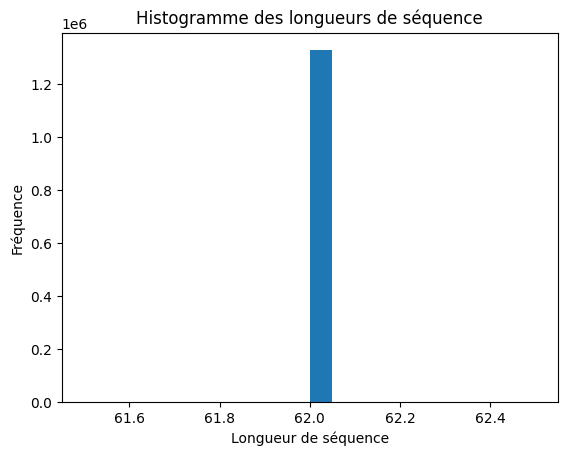

In [10]:
# Obtenir les longueurs de séquence
sequence_lengths = [len(token_ids) for token_ids in tokens['input_ids'].numpy()]

# Afficher l'histogramme des longueurs de séquence
plt.hist(sequence_lengths, bins=20)
plt.title('Histogramme des longueurs de séquence')
plt.xlabel('Longueur de séquence')
plt.ylabel('Fréquence')
plt.show()

In [11]:
# Obtenir la longueur maximale
max_sequence_length = max(sequence_lengths)

# Obtenir l'indice de la plus longue séquence
indice_plus_longue_sequence = sequence_lengths.index(max_sequence_length)

# Longueur de la plus longue séquence
longueur_plus_longue_sequence = sequence_lengths[indice_plus_longue_sequence]

print(f"Longueur maximale du vecteur : {max_sequence_length}")
print(f"Longueur de la plus longue séquence : {longueur_plus_longue_sequence}")


Longueur maximale du vecteur : 62
Longueur de la plus longue séquence : 62


In [12]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import  LabelEncoder

# Entrées pour l'entraînement
data_num = scaled_df
data_text = pad_sequences(tokens['input_ids'].numpy(), maxlen=max_sequence_length, padding='post')

# verification les données numériques sont correctes
print("Shape of data_num:", data_num.shape)

# verification les données textuelles sont correctes après le rembourrage
print("Shape of data_text:", data_text.shape)

# verification les étiquettes sont correctes
print("Shape of labels:", y.shape)

# Encodage des étiquettes
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print(y_encoded)

Shape of data_num: (1327387, 12)
Shape of data_text: (1327387, 62)
Shape of labels: (1327387,)
[0 0 0 ... 3 3 3]


In [13]:
from transformers import TFBertModel, BertTokenizer
from tensorflow.keras import layers, Model

# Entrées
input_num = layers.Input(shape=(scaled_df.shape[1],))
input_text = layers.Input(shape=(data_text.shape[1],), dtype=tf.int32)

# Branches du modèle
# Branche numérique - FFN
num_branch = layers.Dense(128, activation='relu')(input_num)
num_branch = layers.Dense(64, activation='relu')(num_branch)

# Branche textuelle - BERT
bert_model = TFBertModel.from_pretrained('bert-base-uncased')
text_branch = bert_model(input_text)['pooler_output']

# Fusion des branches
merged = layers.concatenate([num_branch, text_branch])

# Couches supplémentaires après la fusion
merged = layers.Dropout(0.5)(merged)
merged = layers.Dense(16, activation='relu')(merged)
output = layers.Dense(4, activation='softmax')(merged)

# Création et compilation du modèle
model = Model(inputs=[input_num, input_text], outputs=output)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [14]:
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 12)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 128)          1664        ['input_1[0][0]']                
                                                                                                  
 input_2 (InputLayer)           [(None, 62)]         0           []                               
                                                                                                  
 dense_1 (Dense)                (None, 64)           8256        ['dense[0][0]']                  
                                                                                              

In [ ]:
from sklearn.model_selection import train_test_split

# Diviser les données en ensembles d'entraînement et de test
text_train, text_test, num_train, num_test, labels_train, labels_test = train_test_split(
    data_text,  # Utilisation de data_text
    scaled_df,
    y_encoded,
    test_size=0.2,
    random_state=42
)


########### premier test #############################################################
############ Meme sur deux epoch j'ai toujours un probleme de ressource RAM ##########
history = model.fit([num_train, text_train], labels_train, epochs=20, batch_size=64, validation_data=([num_test, text_test], labels_test))


Epoch 1/20
 5539/16593 [=========>....................] - ETA: 12:39:49 - loss: 1.0043 - accuracy: 0.5023

In [ ]:
!pip install keras-tuner


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from kerastuner.tuners import BayesianOptimization
from kerastuner.engine.hyperparameters import HyperParameters
from transformers import TFBertModel, BertTokenizer
from tensorflow.keras import layers, Model, Input
from sklearn.metrics import accuracy_score

# Fonction pour construire le modèle
def build_model(hp):
    input_num = Input(shape=(scaled_df.shape[1],))
    input_text = Input(shape=(data_text.shape[1],), dtype=tf.int32)

    # Branches du modèle
    # Branche numérique - FFN
    num_branch = layers.Dense(hp.Choice('num_units', values=[64, 128, 256]), activation='relu')(input_num)
    num_branch = layers.Dense(hp.Choice('num_units', values=[32, 64, 128]), activation='relu')(num_branch)

    # Branche textuelle - BERT
    bert_model = TFBertModel.from_pretrained('bert-base-uncased')
    text_branch = bert_model(input_text)['pooler_output']

    # Fusion des branches
    merged = layers.concatenate([num_branch, text_branch])

    # Couches supplémentaires après la fusion
    merged = layers.Dropout(hp.Choice('dropout', values=[0.3, 0.5]))(merged)
    merged = layers.Dense(hp.Choice('dense_units', values=[16, 32, 64]), activation='relu')(merged)

    output = layers.Dense(4, activation='softmax')(merged)

    model = Model(inputs=[input_num, input_text], outputs=output)

    batch_size = hp.Choice('batch_size', values=[16, 32, 64])
    model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

# Division des données en ensembles d'entraînement et de test
text_train, text_test, num_train, num_test, labels_train, labels_test = train_test_split(
    data_text,
    scaled_df,
    y_encoded,
    test_size=0.2,
    random_state=42
)

# Recherche des meilleurs hyperparamètres
tuner = BayesianOptimization(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    hyperparameters=HyperParameters(),
    directory='./my_dir/',
    project_name='bert_ffn_hyperparam_tuning'
)

tuner.search([num_train, text_train], labels_train, epochs=10, validation_data=([num_test, text_test], labels_test))

# Obtention des meilleurs hyperparamètres trouvés
best_hps = tuner.oracle.get_best_trials(num_trials=1)[0].hyperparameters
print(f"Meilleurs hyperparamètres: {best_hps}")


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w


Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
128               |128               |num_units
0.5               |0.5               |dropout
32                |32                |dense_units
32                |32                |batch_size



Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Epoch 1/10
  936/33185 [..............................] - ETA: 188:38:32 - loss: 1.0460 - accuracy: 0.4793

In [ ]:
best_hyperparameters = best_hps.get_config()
print("Best Hyperparameters:")
for key, value in best_hyperparameters.items():
    print(f"{key}: {value}")

In [ ]:

# Réutiliser les meilleurs hyperparamètres pour construire le modèle final
model = build_model(best_hps)

# Entraîner le modèle
history = model.fit([num_train, text_train], labels_train, epochs=40, batch_size=16, validation_data=([num_test, text_test], labels_test))


In [ ]:
from sklearn.metrics import classification_report

# Évaluation du modèle sur les données de test
evaluation_results = model.evaluate([num_test, text_test], labels_test)

# Impression des résultats d'évaluation
print("Perte sur les données de test:", evaluation_results[0])
print("Précision sur les données de test:", evaluation_results[1])

# Prédiction sur les données de test
y_pred = model.predict([num_test, text_test])

print(y_pred)

# Convertir les indices des classes prédites en étiquettes
y_pred_classes = np.argmax(y_pred, axis=1)

# Afficher le rapport de classification
class_report = classification_report(labels_test, y_pred_classes)
print("Rapport de classification :\n", class_report)


In [ ]:
from sklearn.metrics import accuracy_score

# Convertir les indices des classes prédites en étiquettes
y_true_classes = np.argmax(labels_test, axis=1) if labels_test.ndim > 1 else labels_test
y_pred_classes = np.argmax(y_pred, axis=1) if y_pred.ndim > 1 else y_pred

# Calculer l'accuracy pour chaque classe
accuracies = []
for class_label in range(4):  # Il y a 4 classes numérotées de 0 à 3
    y_true_class = (y_true_classes == class_label).astype(int)
    y_pred_class = (y_pred_classes == class_label).astype(int)
    class_accuracy = accuracy_score(y_true_class, y_pred_class)
    accuracies.append(class_accuracy)

# Afficher les accuracies pour chaque classe
for class_label, accuracy in enumerate(accuracies):
    print(f"Accuracy for class {class_label}: {accuracy}")


In [ ]:
# Extraction of training metrics
training_loss = history.history['loss']
training_accuracy = history.history['accuracy']
validation_loss = history.history['val_loss']
validation_accuracy = history.history['val_accuracy']

# Plotting loss and accuracy curves separately
epochs = range(1, len(training_loss) + 1)

# Plotting training and validation curves
plt.figure(figsize=(12, 6))

# Plotting training and validation loss
plt.subplot(1, 2, 1)
plt.plot(epochs, training_loss, label='Training loss')
plt.plot(epochs, validation_loss, label='Validation loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, training_accuracy, label='Training accuracy')
plt.plot(epochs, validation_accuracy, label='Validation accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Displaying both subplots
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Matrice de confusion
conf_matrix = confusion_matrix(labels_test, y_pred_classes)
class_names = ['heavy_attacks', 'heavy_benign', 'light_attacks', 'light_benign']

df_cm = pd.DataFrame(conf_matrix, index=class_names, columns=class_names)

# Afficher la matrice de confusion avec seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(df_cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vraies valeurs')
plt.show()


In [ ]:
# Vérifier la forme des tableaux labels_test et y_pred_classes
print("Shape of labels_test:", labels_test.shape)
print("Shape of y_pred_classes:", y_pred_classes.shape)

from sklearn.preprocessing import LabelBinarizer

# Binariser labels_test
lb = LabelBinarizer()
labels_test_binary = lb.fit_transform(labels_test)


from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calcul des courbes ROC et AUC pour chaque classe
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(labels_test_binary[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotter les courbes ROC pour chaque classe
plt.figure(figsize=(8, 6))
for i in range(4):
    plt.plot(fpr[i], tpr[i], lw=2, label='Class %d (AUC = %0.2f)' % (i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbes ROC pour chaque classe')
plt.legend(loc="lower right")
plt.show()
